# Lab 06

This week, we'll continue with the tutorial on using the HTRC Extracted Features Dataset, through Python. Last week was the preparation, this week is the fun stuff!

## Pandas and the Extracted Features Dataset, continued

In [97]:
import pandas as pd

### Method Chaining

In Pandas, you may find yourself combining a number of Dataframe methods in a row. When the output of each step is a DataFrame, you don't have to save each step to a variable: you can 'chain' the commands. So, if you want to transfer a DataFrame called `original`:

```python
df1 = original.do_something()
df2 = df1.do_something_else()
df3 = df2.do_more()
```
, you can get the same result as follows:

```python
df3 = original.do_something().do_something_else().do_more()
```

You may see the benefit and the downside of method chaining above.

The benefit: you're not saving intermediate DataFrames to variables. `df1` and `df2` were only necessary to get you to `df3`, so why even save them?

The downside is less readability: yuck! This is fine for short chains, but for longer ones you still want the line breaks. That way, when you return to your code in the future, you can make sense of it (and so I can read it when marking!).

To format chained methods better, you can wrap everything in braces, which tells Python that the current line of code isn't done until the braces end:

```python
(df3 = original.do_something()
               .do_something_else()
               .do_more()
)
```

Much prettier. This style will be useful once things get more complex. Remember that you're not forced to use chaining: saving intermediate variables is fine, and can be helpful if you find a bug somewhere in the chain. However, you'll see it occasionally in example code, so it is good to understand what is happening.

### Slicing

Following from last week's reading on [Text Mining in Python through the HTRC Feature Reader](http://programminghistorian.org/lessons/text-mining-with-extracted-features), we'll be continuing from the 'Slicing DataFrames' section to the end.

First, lets reload the volume from last lab task.

In [98]:
from htrc_features import FeatureReader
fr = FeatureReader('../Data/mdp.49015002392919.json.bz2')
vol = fr.first()
vol

**Q1**: Fill in the blanks to produce the output show in the image below:

```
(vol.tokenlist(pages=**BLANK1**, pos=**BLANK2**, case=False)
    .loc[("body", slice(None), "**BLANK3**"),]
    .sort_values("count", ascending=**BLANK4**)
    .head(**BLANK5**)
)
```

![](../images/lab6-output.png)

_Multiple Choice_
1. True, False
2. True, False
3. slice(None), "body", "RB", "NNP"
4. True, False
5. 3, 5, 7

## Answer: False, True, "RB", True, 5

In [99]:
(vol.tokenlist(pages=False, pos=True, case=False)
    .loc[("body", slice(None), "RB"),]
    .sort_values("count", ascending=True)
    .head(5)
)

count
section lowercase pos       
body    "anyways  RB       1
        nowadays  RB       1
        notch     RB       1
        notably   RB       1
        north     RB       1

**Q2**: What is the code to get the token frequencies for page 39 of the book? You'll start with `tl = vol.tokenlist()`, what's next?

In [158]:
tl = vol.tokenlist()
tl.loc[(39),] # for all tokens
#tl.loc[(39, 'body')] # for just body tokens, though the output is the same for this page and volumes

count
section token         pos       
body    ,             ,        8
        .             .        5
        ;             :        1
        And           CC       1
        Blanc         NNP      1
        England       NNP      1
        If            IN       1
        Mont          NNP      1
        Play          NNP      1
        The           DT       1
        There         EX       1
        Work          NN       1
        a             DT       5
        amusement     NN       1
        and           CC       4
        are           VBP      1
        artificial    JJ       1
        attain        VB       1
        awhile        RB       1
        because       IN       1
        been          VBN      1
        body          NN       2
        book          NN       1
        boy           NN       1
        but           CC       1
        change        NN       1
        circumstances NNS      1
        climbing      VBG      1
        comprehended  VBN      1
        considerable  JJ       1
...                          ...
        ten-pins      NNS      1
        that          DT       2
                      WDT      1
        the           DT       6
        them          PRP      1
        then          RB       2
        they          PRP      2
        thing         NN       1
        thirty        CD       1
        this          DT       2
        to            TO       6
        toward        IN       1
        treadmill     NN       1
        turn          VB       1
        twenty        CD       1
        understand    VB       1
        wages         NNS      1
        wealthy       JJ       1
        wended        VBD      1
        were          VBD      1
        whatever      WDT      2
        which         WDT      1
        while         IN       1
        who           WP       1
        why           WRB      1
        wise          JJ       1
        work          NN       2
        worldly       JJ       1
        would         MD       4
        writer        NN       1

[112 rows x 1 columns]

**Q3**: How would you get the five most frequent words tagged as a proper noun or a plural noun? Since the question doesn't involve page-level counts, you'll want to start with `tl = vol.tokenlist(pages=False)`.

In [101]:
tl = vol.tokenlist(pages=False)
nnp_nns = tl.loc[(slice(None),slice(None),['NNP', 'NNS']),]
nnp_nns.head(5)

count
section token  pos       
body    !—Look NNP      1
        !—and  NNP      1
        !—he   NNP      1
        !—the  NNP      1
        !—you  NNS      1

### Grouping

**Q4**: What does the following code do?

```python
tl = vol.tokenlist()
tl.groupby(level='page').count().sort_values('count', ascending=False)
```

How does it differ from the following?

```python
tl = vol.tokenlist()
tl.groupby(level='page').sum().sort_values('count', ascending=False)
```

## Answer: both are returning counts of tokens for each page, sorted by pages with the most tokens first. The difference is that .count will not return null or NaN values, while .sum just returns a count of all values.

In [110]:
tl = vol.tokenlist()
tl.head()
# tl.groupby(level='page').count().sort_values('count', ascending=False)
# Above gives total token counts by page, no other info

# tl = vol.tokenlist()
# tl.groupby(level='page').sum().sort_values('count', ascending=False)
# Above gives token count per page, sorted by count


# tl.groupby(level=['pos']).count()

#  ?tl.sum()

count
page section token  pos       
3    body    .      .        1
             0      CD       1
             1      CD       1
             2003   CD       1
             38-297 CD       1

**Q5** (2pts): Set a new variable to `vol.tokenlist().reset_index()`.

**a)** What did `reset_index` do?
**b)** How would you get run the summing code from above (i.e. the second example in Q4)?

## Answer:
a) This removes multi-level indexes from tl, and converts them into entries in columns. It also adds a new numerical column, for each row, that can serve as an index.

b) see here:

In [131]:
new_tl = vol.tokenlist().reset_index()
new_tl.groupby(['page'], as_index=False).sum().sort_values('count', ascending=False)

,page,count
295,308,412
10,23,384
94,107,381
296,309,372
247,260,370
148,161,367
199,212,364
138,151,362
146,159,360
165,178,360


**Q6**: Using the DataFrame from Q5, how would you select the rows with counts for the word `Tom`? Remember from the reading that 'slicing' is something done only on indexes - you learned to select based on a column value last week.

In [104]:
tl_tom = new_tl[new_tl['token'] == "Tom"]
tl_tom

,page,section,token,pos,count
115,12,body,Tom,NNP,3
261,15,body,Tom,NNP,6
338,16,body,Tom,NNP,1
371,17,body,Tom,NNP,1
493,21,body,Tom,NNP,1
609,22,body,Tom,NNP,2
775,23,body,Tom,NNP,1
962,24,body,Tom,NNP,6
1134,25,body,Tom,NNP,7
1279,26,body,Tom,NNP,1


**Q7**: Using the result from Q6, figure out how to plot the counts of 'Tom' by page. The plot method for DataFrames takes `x` and `y` arguments. Share the code to produce this:

![](../images/lab6-sawyer-plot.png)

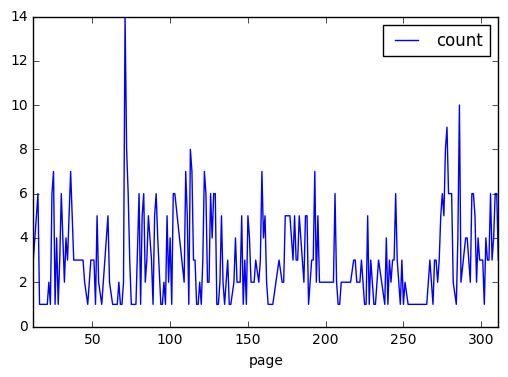

In [105]:
import matplotlib
%matplotlib inline

tl_tom.plot(x='page', y='count')

### Pandas Series

Where a Pandas DataFrame object is like a spreadsheet, with rows and columns, a Pandas Series object is like just one column: it is a sequence of just one value at a time. You can think of it as a supercharged list.

To pull out a single column of a DataFrame as a Series, use square brackets to reference the column by name. Using the DataFrame from Q7, where the index has been reset to columns, here's an example:

In [132]:
token_series = new_tl['token']

# Show five random items from the series
token_series.sample(5)

10040    speed
24182     ruin
48100      and
32056    Every
4537      like
Name: token, dtype: object

If you want to add a series to a DataFrame as a column, you can do the same in reverse:

In [133]:
new_tl['new_column'] = token_series
new_tl.sample(5)

,page,section,token,pos,count,new_column
35987,239,body,as,IN,1,as
20721,145,body,water,NN,1,water
38052,252,body,massive,JJ,1,massive
36921,245,body,down,RB,1,down
10185,81,body,long,JJ,1,long


Tada!

A series has a couple of useful features. For example, you can apply a function against each item with `apply`. If we wanted to get the length of every string (like we manually would do with `len('string')`, it's possible in this way:

In [134]:
token_series.apply(len).head()

0    1
1    1
2    1
3    4
4    6
Name: token, dtype: int64

Is it clear what happened there? `apply` took the function we gave it, `len`, and for each value in the Series applied `len(value)`.

If this was a list instead of a Series, the equivalent would be `[len(string) for string in list_of_strings]`.

Just to be more clear, I'll add it as a column:

In [135]:
new_tl['token_length'] = token_series.apply(len)
new_tl.sample(5)

,page,section,token,pos,count,new_column,token_length
23440,162,body,kind,NN,1,kind,4
7441,64,body,tittering,NN,1,tittering,9
41521,272,body,came,VBD,1,came,4
36932,245,body,for,IN,2,for,3
3718,41,body,without,IN,1,without,7


Looks right!

Another useful method of a Series is `value_counts`, which simply counts how often each value occurs:

In [136]:
token_series.value_counts().head()

that    502
"       485
's      364
.       297
and     296
Name: token, dtype: int64

Finally, for a Series that specifically has strings, there are string methods. Try `token_series.str.<TAB>` to see the autofill of what is possible.

Going back to our ALTA filtering for `isalpha()`, we can quickly do the same here:

In [137]:
is_alpha_matches = token_series.str.isalpha()
is_alpha_matches.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9     True
Name: token, dtype: bool

We saw in Lab 5 that supplying a set of True or False values to a DataFrame allows us to select rows. lets try it with the above Series:

In [139]:
new_tl.head(10)

,page,section,token,pos,count,new_column,token_length
0,3,body,.,.,1,.,1
1,3,body,0,CD,1,0,1
2,3,body,1,CD,1,1,1
3,3,body,2003,CD,1,2003,4
4,3,body,38-297,CD,1,38-297,6
5,3,body,4,CD,1,4,1
6,3,body,DEMCO,NNP,1,DEMCO,5
7,3,body,M,NNP,1,M,1
8,7,body,LEATHER,NNP,1,LEATHER,7
9,7,body,LIMP,NNP,1,LIMP,4


In [140]:
new_tl[is_alpha_matches].head()

,page,section,token,pos,count,new_column,token_length
6,3,body,DEMCO,NNP,1,DEMCO,5
7,3,body,M,NNP,1,M,1
8,7,body,LEATHER,NNP,1,LEATHER,7
9,7,body,LIMP,NNP,1,LIMP,4
10,7,body,MARK,NNP,1,MARK,4


It worked! Of the top ten rows, the only ones that are selected are solely alphabetical. Remember that `is_alpha_matches` is simple `tl['token'].str.isalpha()`, which could have been used for selection.

Finally, one more string method, `lower()`:

In [142]:
new_tl['lowercase'] = token_series.str.lower()
new_tl.sample(5)

,page,section,token,pos,count,new_column,token_length,lowercase
31097,209,body,for,IN,2,for,3,for
46206,299,body,laughed,VBD,1,laughed,7,laughed
46986,305,body,actual,JJ,1,actual,6,actual
7175,63,body,by,IN,1,by,2,by
15258,113,body,gasped,VBD,1,gasped,6,gasped


**Q8**: How is `token_series.str.istitle()` different from `token_series.str.isupper()`?

## Answer
token_series.str.istitle() will check for titlecase--if the first letter of each word in a string is capitalized--while token_series.str.isupper() will check if *every* letter in a string is capitalized.

**Q9**: Which of the following options returns the tokens that have a hyphen in them?

 1. `tl[tl['token'].str.has('-')]`
 2. `tl[tl['token'].str.contains('-')]`
 3. `tl[tl['token'].contains('-')]`
 4. `tl[tl['token'] == '-']`
 5. None of the above

## Answer:
#2 returns tokens with hyphens. #1 and #3 are invalid methods and #4 returns tokens that are *just* hyphens